In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
MovieData=pd.read_csv("D:\IMDb Movies India.csv",encoding='latin1')
MovieData.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\jefys\AppData\Local\Temp\ipykernel_13056\2733181389.py:1: SyntaxWarning: invalid escape sequence '\I'
  MovieData=pd.read_csv("D:\IMDb Movies India.csv",encoding='latin1')


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [3]:
MovieData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
MovieData.shape

(15509, 10)

In [5]:
MovieData.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [6]:
MovieData =MovieData.drop(columns=['Name', 'Actor 2', 'Actor 3'])
MovieData.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor


In [7]:
MovieData.dropna(inplace=True)

In [8]:
MovieData.drop_duplicates(inplace=True)
MovieData.shape

(5746, 7)

In [9]:
MovieData['Year'].unique()

array(['(2019)', '(1997)', '(2005)', '(2012)', '(2014)', '(2004)',
       '(2016)', '(1991)', '(2018)', '(2010)', '(1958)', '(2021)',
       '(2017)', '(2009)', '(1993)', '(2002)', '(2008)', '(1994)',
       '(2007)', '(2003)', '(1998)', '(1979)', '(1974)', '(2015)',
       '(2006)', '(1981)', '(2020)', '(1985)', '(2013)', '(2011)',
       '(1988)', '(1987)', '(1996)', '(1999)', '(1973)', '(1968)',
       '(1982)', '(1977)', '(1950)', '(1969)', '(1948)', '(1990)',
       '(1989)', '(2001)', '(2000)', '(1953)', '(1978)', '(1963)',
       '(1992)', '(1976)', '(1984)', '(1986)', '(1966)', '(1975)',
       '(1980)', '(1967)', '(1970)', '(1952)', '(1972)', '(1971)',
       '(1964)', '(1954)', '(1962)', '(1957)', '(1965)', '(1995)',
       '(1956)', '(1955)', '(1936)', '(1983)', '(1951)', '(1961)',
       '(1959)', '(1949)', '(1960)', '(1946)', '(1940)', '(1945)',
       '(1938)', '(1941)', '(1942)', '(1935)', '(1937)', '(1947)',
       '(1931)', '(1933)', '(1943)', '(1944)', '(1932)', '(193

In [10]:
def handleYear(value):
    value = str(value).strip('()')
    return int(value)
MovieData['Year'] = MovieData['Year'].apply(handleYear)
MovieData['Year'].head()

1    2019
3    2019
5    1997
6    2005
8    2012
Name: Year, dtype: int64

In [11]:
MovieData['Duration'].unique()

array(['109 min', '110 min', '147 min', '142 min', '82 min', '116 min',
       '96 min', '120 min', '161 min', '166 min', '102 min', '87 min',
       '132 min', '105 min', '146 min', '168 min', '158 min', '126 min',
       '94 min', '138 min', '124 min', '144 min', '157 min', '136 min',
       '107 min', '113 min', '80 min', '122 min', '149 min', '148 min',
       '130 min', '121 min', '188 min', '115 min', '103 min', '114 min',
       '170 min', '100 min', '99 min', '140 min', '128 min', '93 min',
       '125 min', '145 min', '75 min', '111 min', '134 min', '104 min',
       '92 min', '137 min', '127 min', '119 min', '135 min', '90 min',
       '150 min', '151 min', '95 min', '52 min', '89 min', '112 min',
       '143 min', '177 min', '117 min', '123 min', '72 min', '154 min',
       '175 min', '153 min', '78 min', '139 min', '133 min', '180 min',
       '46 min', '164 min', '162 min', '171 min', '160 min', '152 min',
       '163 min', '165 min', '141 min', '129 min', '156 min', '240 

In [12]:
def handleDuration(value):
    value=str(value).split(' ')
    value=value[0]
    return int(value)
MovieData['Duration']=MovieData['Duration'].apply(handleDuration)
MovieData['Duration'].head()

1    109
3    110
5    147
6    142
8     82
Name: Duration, dtype: int64

In [13]:
def split_genre_column(MovieData,Genre):
   
    MovieData['Genre1'] = MovieData[Genre].str.split(',', expand=True)[0]
    MovieData['Genre2'] = MovieData[Genre].str.split(',', expand=True)[1]
    MovieData['Genre3'] = MovieData[Genre].str.split(',', expand=True)[2]
    return MovieData

split_genre_column(MovieData,'Genre')

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,None,None
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Comedy,Romance,None
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Comedy,Drama,Musical
6,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Drama,Romance,War
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Drama,None,None
15494,2001,153,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Biography,Drama,History
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Action,Crime,Drama
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Action,Drama,None


In [14]:
MovieData.isna().sum()

Year           0
Duration       0
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Genre1         0
Genre2      1717
Genre3      3412
dtype: int64

In [15]:
MovieData = MovieData.fillna(0)
MovieData.isna().sum()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Genre1      0
Genre2      0
Genre3      0
dtype: int64

In [16]:
G=['Genre1','Genre2','Genre3']
for x in G:
    MovieData[x],_ = pd.factorize(MovieData[x])
    
MovieData = MovieData.drop(columns=['Genre'])
MovieData.head(3)

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,0,0,0
3,2019,110,4.4,35,Ovais Khan,Prateik,1,1,0
5,1997,147,4.7,827,Rahul Rawail,Bobby Deol,1,2,1


In [17]:
MovieData['Votes'].unique()

array(['8', '35', '827', ..., '70,344', '408', '1,496'], dtype=object)

In [18]:
def handleVotes(value):
    value = str(value).replace(',','')
    return int(value)
MovieData['Votes'] = MovieData['Votes'].apply(handleVotes)
MovieData['Votes'].head()

1       8
3      35
5     827
6    1086
8     326
Name: Votes, dtype: int64

In [19]:
MovieData['MovieAge'] = 2024 - MovieData['Year']
MovieData['MovieAge'] 

1         5
3         5
5        27
6        19
8        12
         ..
15493     9
15494    23
15503    35
15505    25
15508    26
Name: MovieAge, Length: 5746, dtype: int64

In [20]:
DirectorCounts =MovieData['Director'].value_counts()
MovieData['DirectorPopularity']= MovieData['Director'].map(DirectorCounts)
ActorCounts= MovieData['Actor 1'].value_counts() 
MovieData['ActorPopularity']=MovieData['Actor 1'].map(ActorCounts) 

In [21]:
MovieData['LogVotes']=np.log1p(MovieData['Votes'])
MovieData['LogVotes'] 

1        2.197225
3        3.583519
5        6.719013
6        6.991177
8        5.789960
           ...   
15493    6.013715
15494    7.311218
15503    3.806662
15505    6.486161
15508    3.044522
Name: LogVotes, Length: 5746, dtype: float64

In [22]:
DirectorAvgRating = MovieData.groupby('Director')['Rating'].mean()
MovieData['DirectorAvgRating'] = MovieData['Director'].map(DirectorAvgRating)

ActorAvgRating = MovieData[['Actor 1']].stack().reset_index(name='Actor')
ActorAvgRating = ActorAvgRating.merge(MovieData[['Rating']], left_on='level_0', right_index=True)
ActorAvgRating = ActorAvgRating.groupby('Actor')['Rating'].mean()
MovieData['ActorAvgRating'] = MovieData['Actor 1'].map(ActorAvgRating) 

# Visualization

## Director Influence on Ratings

C:\Users\jefys\AppData\Local\Temp\ipykernel_13056\3326298237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=MovieData[MovieData['Director'].isin(TopDirectors)], x='Director', y='Rating', palette='rocket')


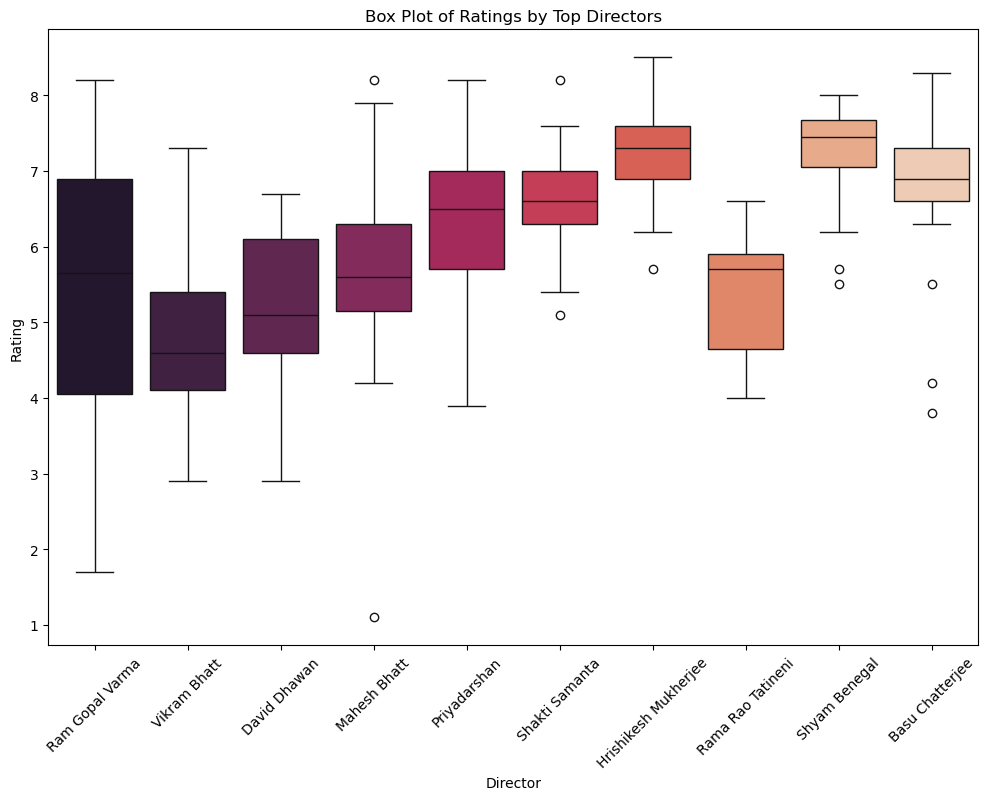

In [23]:
plt.figure(figsize=(12, 8))
TopDirectors=MovieData['Director'].value_counts().index[0:10]
sns.boxplot(data=MovieData[MovieData['Director'].isin(TopDirectors)], x='Director', y='Rating', palette='rocket')

plt.title('Box Plot of Ratings by Top Directors')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

-- Ratings are positively affected by top directors like Hrishikesh Mukherjee and Shakti Samanta, who consistently receive higher median ratings.

-- directors like Ram Gopal Varma and Vikram Bhatt exhibit a wide range of ratings, indicating variable reception and less predictable quality

-- Notable outliers for directors like Mahesh Bhatt highlight significant deviations in their movie ratings

## Actor Influence on Ratings

C:\Users\jefys\AppData\Local\Temp\ipykernel_13056\4245012483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=MovieData[MovieData['Actor 1'].isin(TopActors)], x='Actor 1', y='Rating', palette='mako')


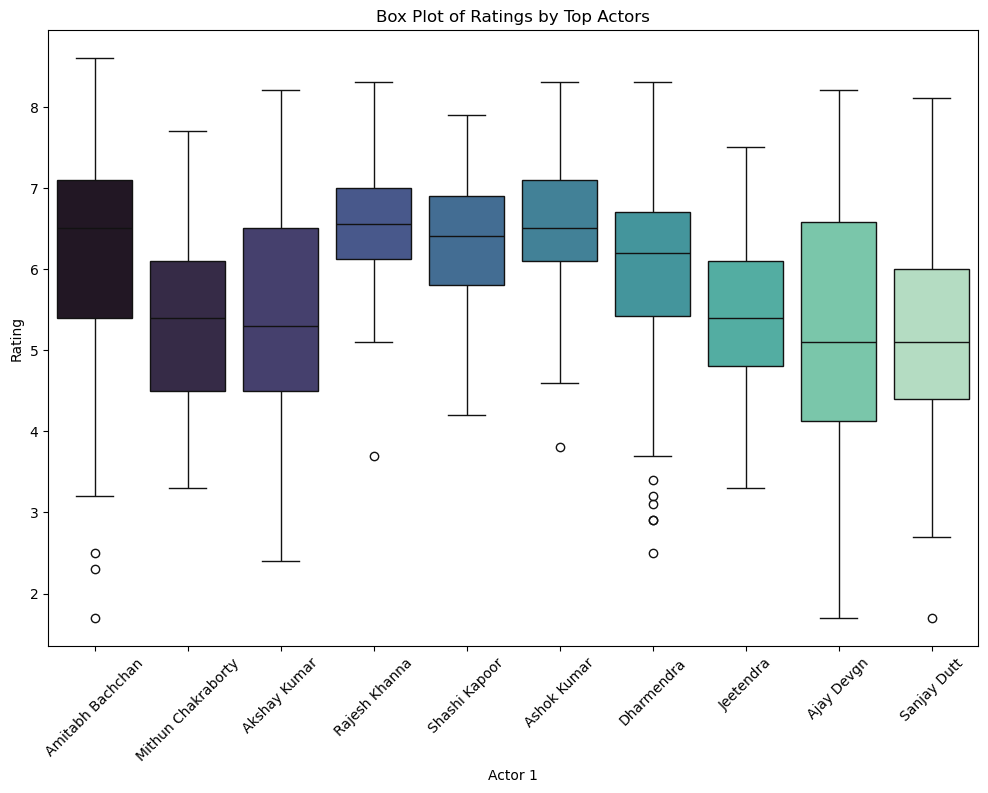

In [24]:
plt.figure(figsize=(12, 8))
TopActors = MovieData['Actor 1'].value_counts().index[:10]
sns.boxplot(data=MovieData[MovieData['Actor 1'].isin(TopActors)], x='Actor 1', y='Rating', palette='mako')

plt.title('Box Plot of Ratings by Top Actors')
plt.xlabel('Actor 1')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

--Ratings are positively affected by top actors like Amitabh Bachchan and Shashi Kapoor, who consistently receive higher median ratings

-- Actors like Ajay Devgn and Sanjay Dutt show a wide range of ratings, indicating variable reception.

--Significant outliers for actors like Mithun Chakraborty and Dharmendra highlight notable deviations in their movie ratings.

## Genre Vs Rating pairplot

<Figure size 1500x1200 with 0 Axes>

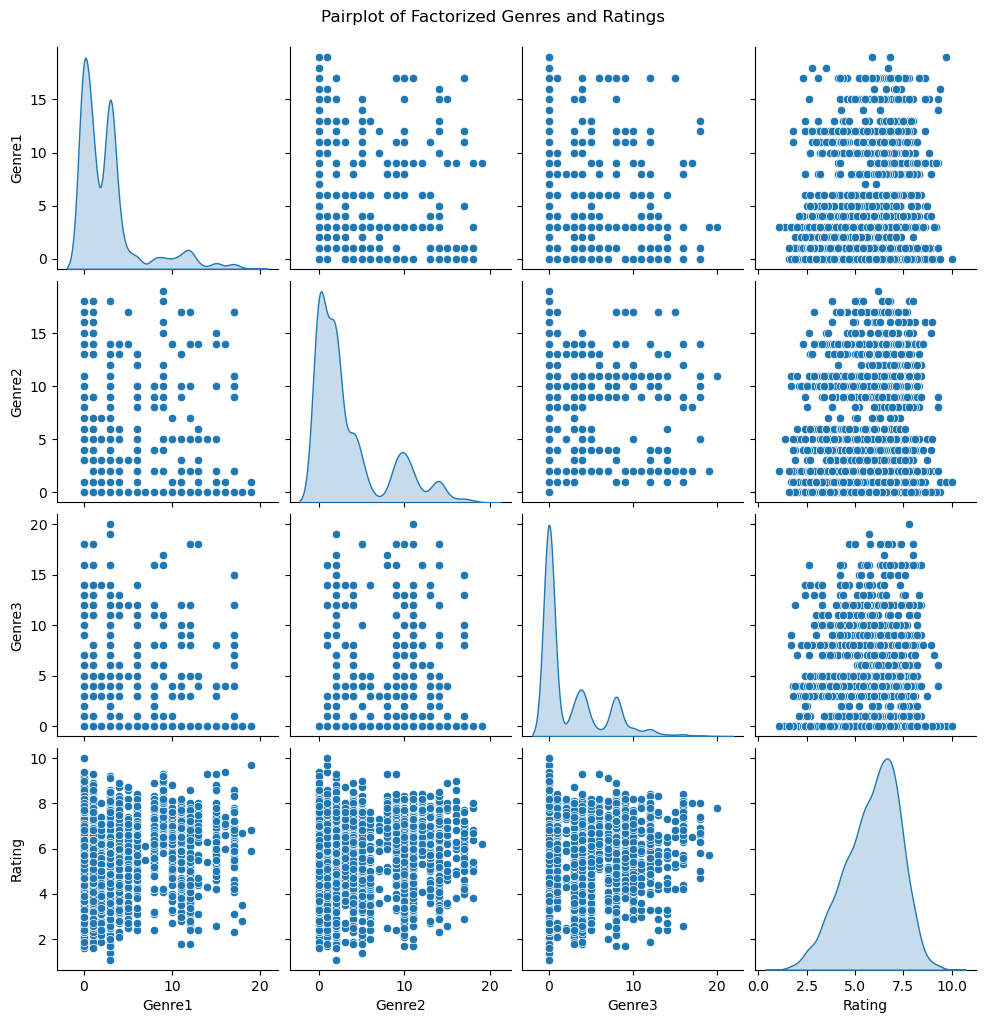

In [25]:
GenreColumns=['Genre1','Genre2','Genre3','Rating']
plt.figure(figsize=(15,12))
sns.pairplot(MovieData[GenreColumns],diag_kind='kde',kind='scatter')

plt.suptitle('Pairplot of Factorized Genres and Ratings', y=1.02)
plt.show()

-- no single genre combination heavily influences the ratings.

-- The distribution of the Genre1 is heavily skewed towards a few dominant genres, while Genre2, Genre3 show more diverse but less frequent distributions.

## Distribution of Duration

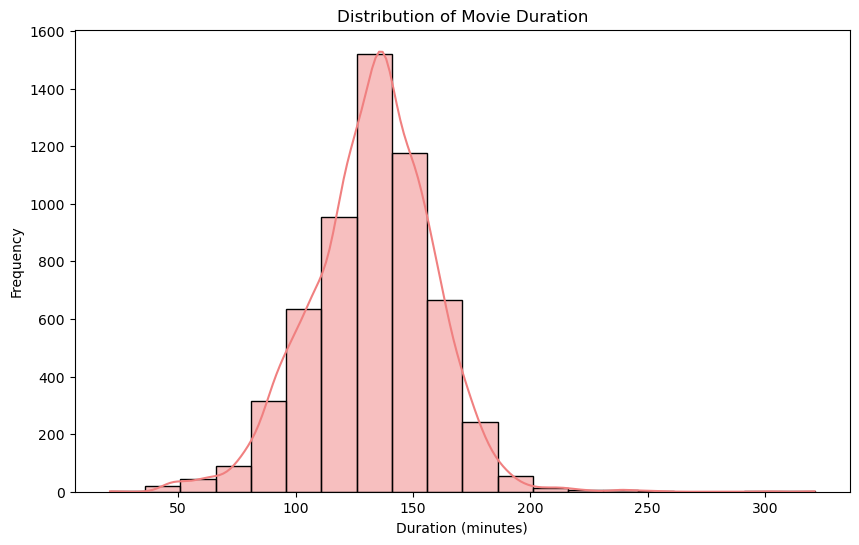

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(MovieData['Duration'],bins=20,kde=True,color='lightcoral')

plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

-- shows that the majority of movies have durations between 100 and 150 minutes

## Box Plot of Ratings by Year

C:\Users\jefys\AppData\Local\Temp\ipykernel_13056\60705060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=MovieData,x='Year',y='Rating',palette='Spectral')


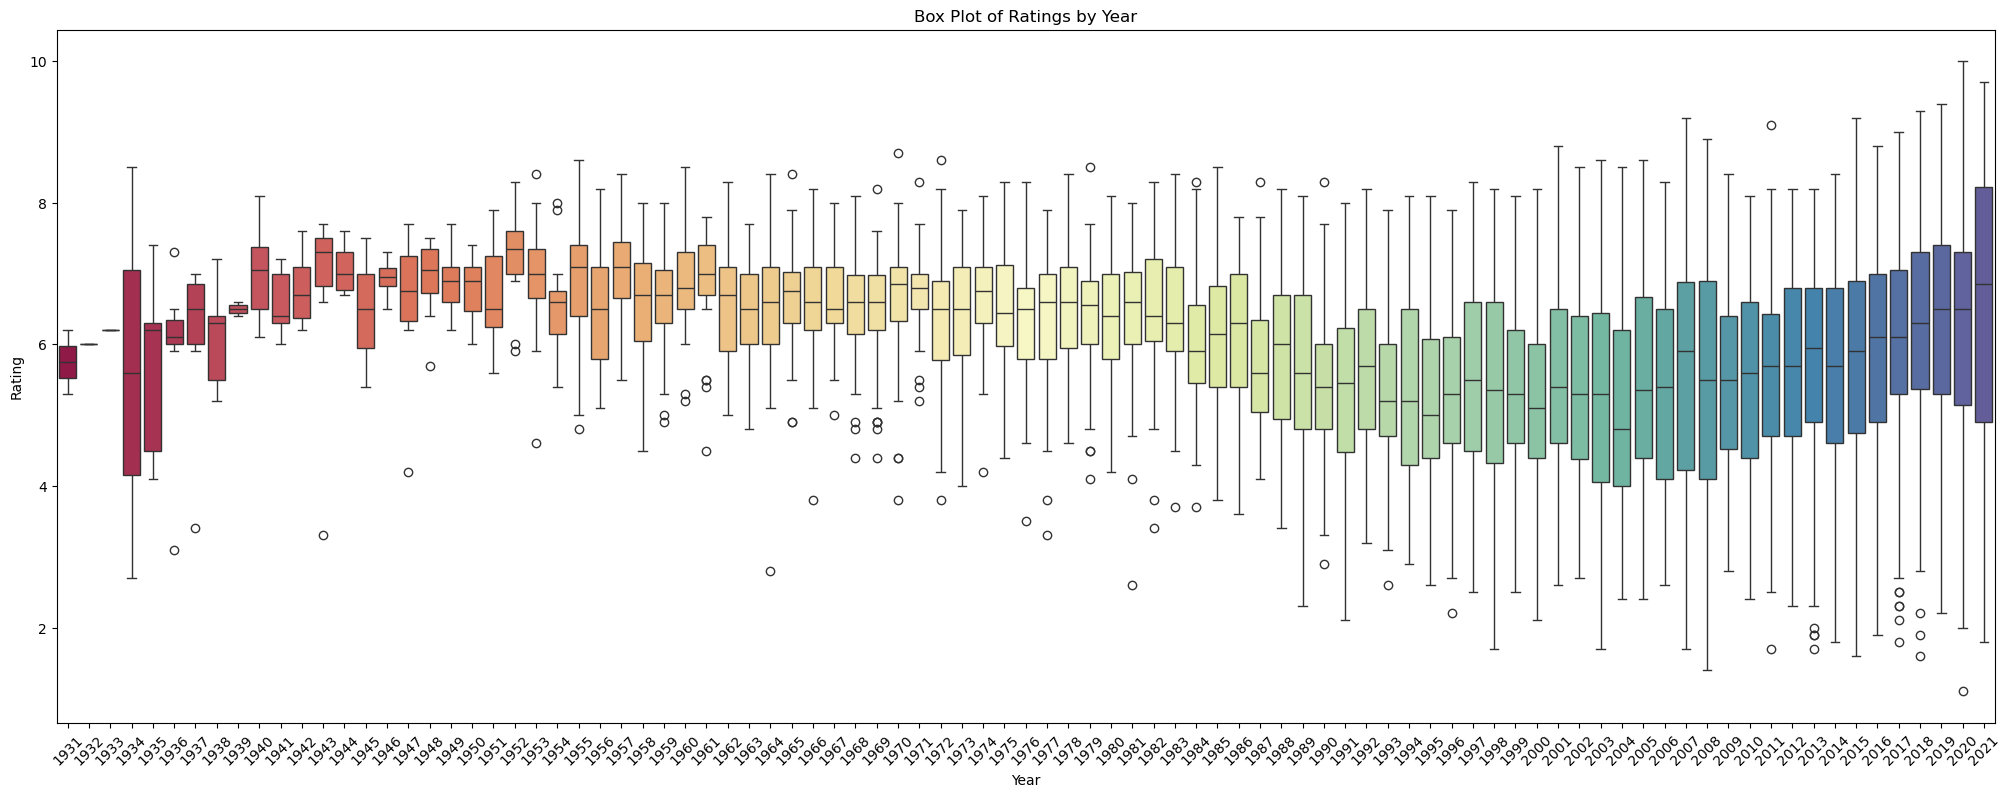

In [27]:
plt.figure(figsize=(25,9))
sns.boxplot(data=MovieData,x='Year',y='Rating',palette='Spectral')
sns.dark_palette("#69d",reverse=True,as_cmap=True)
plt.title('Box Plot of Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

-- There is a general upward trend in movie ratings over the years

-- Outliers are more in the earlier years.

## Votes Distribution

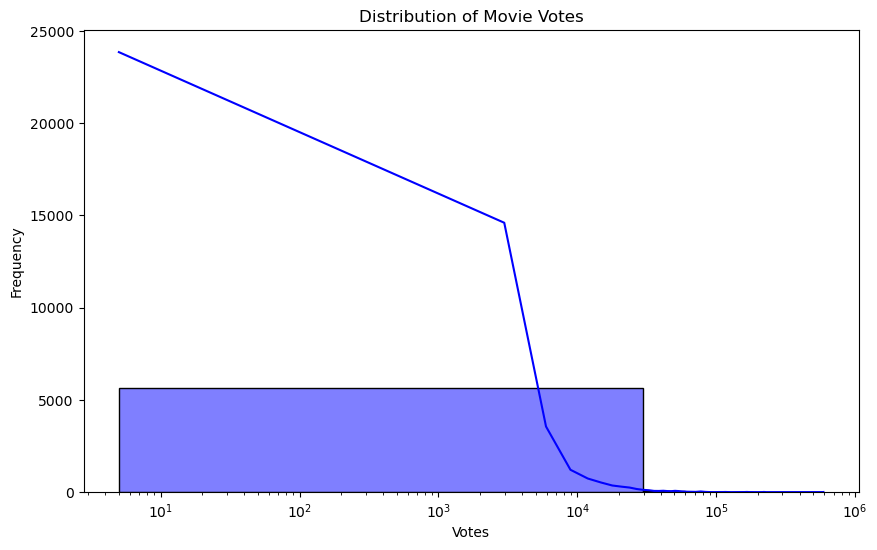

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(MovieData['Votes'],bins=20,kde=True,color='blue')
plt.title('Distribution of Movie Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

-- Most movies received less number of votes

-- There is a rapid decline in frequency as the number of votes increases.

-- Very few movies received a high number of votes.

## Violin Plot of Ratings by Genre

C:\Users\jefys\AppData\Local\Temp\ipykernel_13056\2559341589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=MovieData,x='Genre1',y='Rating',palette='Set2')


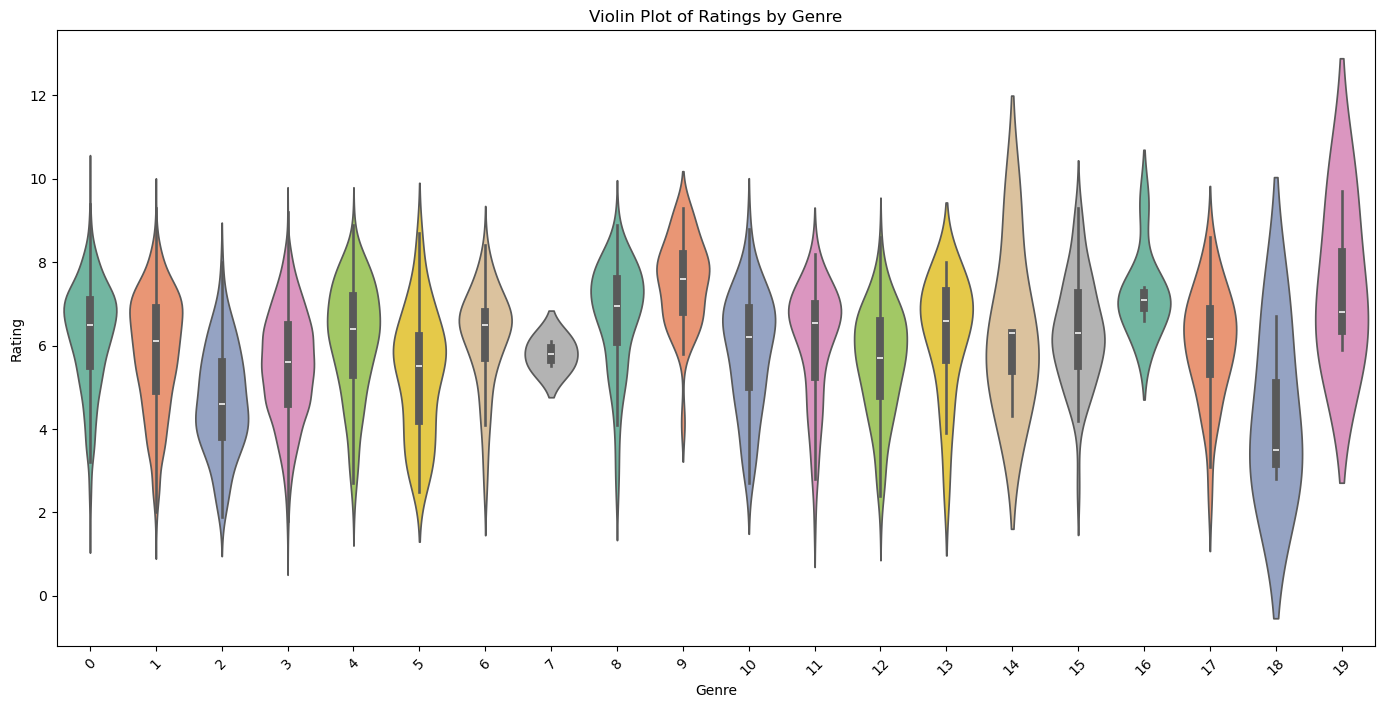

In [29]:
plt.figure(figsize=(17,8))
sns.violinplot(data=MovieData,x='Genre1',y='Rating',palette='Set2')
plt.title('Violin Plot of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

## Joint Plot of Votes vs Rating

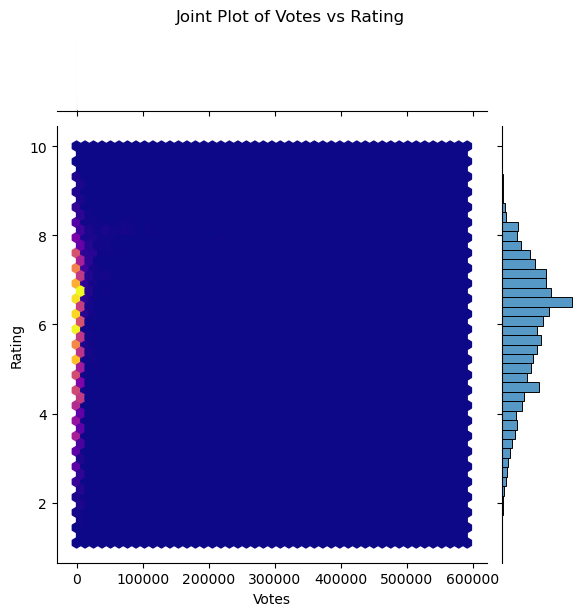

In [30]:
sns.jointplot(data=MovieData,x='Votes',y='Rating',kind='hex',cmap='plasma')
plt.suptitle('Joint Plot of Votes vs Rating', y=1.02)
plt.show()

In [31]:
MovieData['Genre1 encoded'] =round(MovieData.groupby('Genre1')['Rating'].transform('mean'),1)
MovieData['Genre2 encoded']=round(MovieData.groupby('Genre2')['Rating'].transform('mean'),1)
MovieData['Genre3 encoded'] =round(MovieData.groupby('Genre3')['Rating'].transform('mean'),1)
MovieData['Votes encoded'] =round(MovieData.groupby('Votes')['Rating'].transform('mean'), 1)
MovieData['Director encoded']= round(MovieData.groupby('Director')['Rating'].transform('mean'), 1)
MovieData['Actor 1 encoded']= round(MovieData.groupby('Actor 1')['Rating'].transform('mean'), 1)
MovieData.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3,MovieAge,...,ActorPopularity,LogVotes,DirectorAvgRating,ActorAvgRating,Genre1 encoded,Genre2 encoded,Genre3 encoded,Votes encoded,Director encoded,Actor 1 encoded
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,0,0,0,5,...,2,2.197225,7.000000,6.850000,6.3,6.0,6.0,5.6,7.0,6.8
3,2019,110,4.4,35,Ovais Khan,Prateik,1,1,0,5,...,5,3.583519,4.400000,5.420000,5.8,5.9,6.0,5.7,4.4,5.4
5,1997,147,4.7,827,Rahul Rawail,Bobby Deol,1,2,1,27,...,18,6.719013,5.313333,4.788889,5.8,5.9,6.0,4.8,5.3,4.8
6,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,0,1,2,19,...,20,6.991177,7.383333,5.435000,6.3,5.9,6.3,7.4,7.4,5.4
8,2012,82,5.6,326,Allyson Patel,Yash Dave,2,3,3,12,...,1,5.789960,5.600000,5.600000,4.7,5.7,5.7,6.6,5.6,5.6


In [32]:
print(MovieData.columns)
MovieData.drop(columns=['Genre1', 'Votes', 'Director', 'Actor 1', 'Genre2', 'Genre3'], inplace=True, errors='ignore')
MovieData['Rating'] =round(MovieData['Rating'],1)

Index(['Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Genre1',
       'Genre2', 'Genre3', 'MovieAge', 'DirectorPopularity', 'ActorPopularity',
       'LogVotes', 'DirectorAvgRating', 'ActorAvgRating', 'Genre1 encoded',
       'Genre2 encoded', 'Genre3 encoded', 'Votes encoded', 'Director encoded',
       'Actor 1 encoded'],
      dtype='object')


# Building the Model 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
import catboost as cb

## Train-Test Split

In [51]:
print(X.dtypes)
print(X.head())
for col in X.columns:
    print(f"{col}: {X[col].unique()[:5]}")
X = X.select_dtypes(include=[np.number])  
X = pd.get_dummies(X, drop_first=True)  # Convert text columns into numeric form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])  # Convert text categories to numbers


X=MovieData.drop("Rating",axis=1)
Y=MovieData["Rating"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=52)

model=LinearRegression()
model.fit(X_train,Y_train)

X_test_prediction= model.predict(X_test)

mse =mean_squared_error(Y_test,X_test_prediction)
print(f"Mean Squared Error (MSE): {mse:.2f}")

r2 = r2_score(Y_test,X_test_prediction)
print(f"R-squared score: {r2:.2f}")

Year                    int64
Duration                int64
MovieAge                int64
DirectorPopularity      int64
ActorPopularity         int64
LogVotes              float64
DirectorAvgRating     float64
ActorAvgRating        float64
Genre1 encoded        float64
Genre2 encoded        float64
Genre3 encoded        float64
Votes encoded         float64
Director encoded      float64
Actor 1 encoded       float64
dtype: object
   Year  Duration  MovieAge  DirectorPopularity  ActorPopularity  LogVotes  \
1  2019       109         5                   1                2  2.197225   
3  2019       110         5                   1                5  3.583519   
5  1997       147        27                  15               18  6.719013   
6  2005       142        19                   6               20  6.991177   
8  2012        82        12                   1                1  5.789960   

   DirectorAvgRating  ActorAvgRating  Genre1 encoded  Genre2 encoded  \
1           7.000000     

In [52]:
print(type(MovieData))  # Should be a DataFrame
print(MovieData.head())  # Show first 5 rows


<class 'pandas.core.frame.DataFrame'>
   Year  Duration  Rating  MovieAge  DirectorPopularity  ActorPopularity  \
1  2019       109     7.0         5                   1                2   
3  2019       110     4.4         5                   1                5   
5  1997       147     4.7        27                  15               18   
6  2005       142     7.4        19                   6               20   
8  2012        82     5.6        12                   1                1   

   LogVotes  DirectorAvgRating  ActorAvgRating  Genre1 encoded  \
1  2.197225           7.000000        6.850000             6.3   
3  3.583519           4.400000        5.420000             5.8   
5  6.719013           5.313333        4.788889             5.8   
6  6.991177           7.383333        5.435000             6.3   
8  5.789960           5.600000        5.600000             4.7   

   Genre2 encoded  Genre3 encoded  Votes encoded  Director encoded  \
1             6.0             6.0     

In [53]:
print(MovieData.dtypes)  # Check column types


Year                    int64
Duration                int64
Rating                float64
MovieAge                int64
DirectorPopularity      int64
ActorPopularity         int64
LogVotes              float64
DirectorAvgRating     float64
ActorAvgRating        float64
Genre1 encoded        float64
Genre2 encoded        float64
Genre3 encoded        float64
Votes encoded         float64
Director encoded      float64
Actor 1 encoded       float64
dtype: object


In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in MovieData.select_dtypes(include=['object']).columns:
    MovieData[col] = le.fit_transform(MovieData[col])  # Convert text categories to numbers


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate features and target variable
X = MovieData.drop("Rating", axis=1)
Y = MovieData["Rating"]

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=52)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions
X_test_prediction = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, X_test_prediction)
r2 = r2_score(Y_test, X_test_prediction)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared score: {r2:.2f}")


Mean Squared Error (MSE): 0.40
R-squared score: 0.79


## Decision Trees

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_DT=DecisionTreeRegressor(random_state=42)
model_DT.fit(X_train,Y_train)
X_test_prediction_DT=model_DT.predict(X_test)

mse_DT =mean_squared_error(Y_test,X_test_prediction_DT)
print(f"Mean Squared Error (MSE): {mse_DT:.2f}")

r2_DT = r2_score(Y_test,X_test_prediction_DT)
print(f"R-squared score: {r2_DT:.2f}")

Mean Squared Error (MSE): 0.51
R-squared score: 0.74


## Random Forests

In [66]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_RF=RandomForestRegressor(n_estimators=100,random_state=50)
model_RF.fit(X_train,Y_train)
X_test_prediction_RF=model_RF.predict(X_test)

mse_RF =mean_squared_error(Y_test,X_test_prediction_RF)
print(f"Mean Squared Error (MSE): {mse_RF:.2f}")

r2_RF = r2_score(Y_test,X_test_prediction_RF)
print(f"R-squared score: {r2_RF:.2f}")

Mean Squared Error (MSE): 0.22
R-squared score: 0.88


## Gradient Boosting

In [67]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_GB = GradientBoostingRegressor(n_estimators=100,random_state=50)
model_GB.fit(X_train,Y_train)
X_test_prediction_GB=model_GB.predict(X_test)

mse_GB =mean_squared_error(Y_test,X_test_prediction_GB)
print(f"Mean Squared Error (MSE): {mse_GB:.2f}")

r2_GB= r2_score(Y_test,X_test_prediction_GB)
print(f"R-squared score: {r2_GB:.2f}")

Mean Squared Error (MSE): 0.27
R-squared score: 0.85


## Support Vector Machines (SVM)

In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_SVR = SVR(kernel='linear',C=1.0,epsilon=0.1,gamma='scale')
model_SVR.fit(X_train,Y_train)
X_test_prediction_SVR=model_SVR.predict(X_test)

mse_SVR =mean_squared_error(Y_test,X_test_prediction_SVR)
print(f"Mean Squared Error (MSE): {mse_SVR:.2f}")

r2_SVR= r2_score(Y_test,X_test_prediction_SVR)
print(f"R-squared score: {r2_SVR:.2f}")

Mean Squared Error (MSE): 0.66
R-squared score: 0.67


## Neural Networks

In [69]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_NN = MLPRegressor(hidden_layer_sizes=(100,),random_state=42)
model_NN.fit(X_train,Y_train)
X_test_prediction_NN=model_NN.predict(X_test)

mse_NN =mean_squared_error(Y_test,X_test_prediction_NN)
print(f"Mean Squared Error (MSE):{mse_NN:.2f}")

r2_NN= r2_score(Y_test,X_test_prediction_NN)
print(f"R-squared score:{r2_NN:.2f}")

Mean Squared Error (MSE):0.41
R-squared score:0.80


## XGBoost

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_XG = xgb.XGBRegressor(n_estimators=100,random_state=52)
model_XG.fit(X_train,Y_train)
X_test_prediction_XG=model_XG.predict(X_test)

mse_XG =mean_squared_error(Y_test,X_test_prediction_XG)
print(f"Mean Squared Error (MSE):{mse_XG:.2f}")

r2_XG= r2_score(Y_test,X_test_prediction_XG)
print(f"R-squared score:{r2_XG:.2f}")

Mean Squared Error (MSE):0.33
R-squared score:0.83


## CatBoost

In [71]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_CB = cb.CatBoostRegressor(iterations=100,random_state=42,verbose=0)
model_CB.fit(X_train,Y_train)
X_test_prediction_CB=model_CB.predict(X_test)

mse_CB =mean_squared_error(Y_test,X_test_prediction_CB)
print(f"Mean Squared Error (MSE):{mse_CB:.2f}")

r2_CB= r2_score(Y_test,X_test_prediction_CB)
print(f"R-squared score:{r2_CB:.2f}")

Mean Squared Error (MSE):0.25
R-squared score:0.86


## Results of all models

In [72]:
results = pd.DataFrame({
    'Model': ['Linear Regression','Decision Tree','Random Forest','Gradient Boosting', 
              'Support Vector Machine','Neural Network','XGBoost','CatBoost'],
    'Mean Squared Error (MSE)': [mse*100,mse_DT*100,mse_RF*100, mse_GB*100,mse_SVR*100,mse_NN*100, mse_XG*100, mse_CB*100],
    'R-squared score (R2)': [r2*100, r2_DT*100,r2_RF*100,r2_GB*100,r2_SVR*100,r2_NN*100,r2_XG*100,r2_CB*100]
})
print(results)

                    Model  Mean Squared Error (MSE)  R-squared score (R2)
0       Linear Regression                 39.630125             79.427109
1           Decision Tree                 50.725217             74.039680
2           Random Forest                 22.280555             87.909691
3       Gradient Boosting                 26.850230             85.370370
4  Support Vector Machine                 66.277785             67.113243
5          Neural Network                 40.579948             79.755654
6                 XGBoost                 32.599649             83.423863
7                CatBoost                 25.428629             86.462858


## Comparision of Results.

In [73]:
models = results['Model']
mse_scores = results['Mean Squared Error (MSE)'].round(2)
r2_scores = results['R-squared score (R2)'].round(2)
num_models = len(models)
bar_width = 0.35
index = np.arange(num_models)

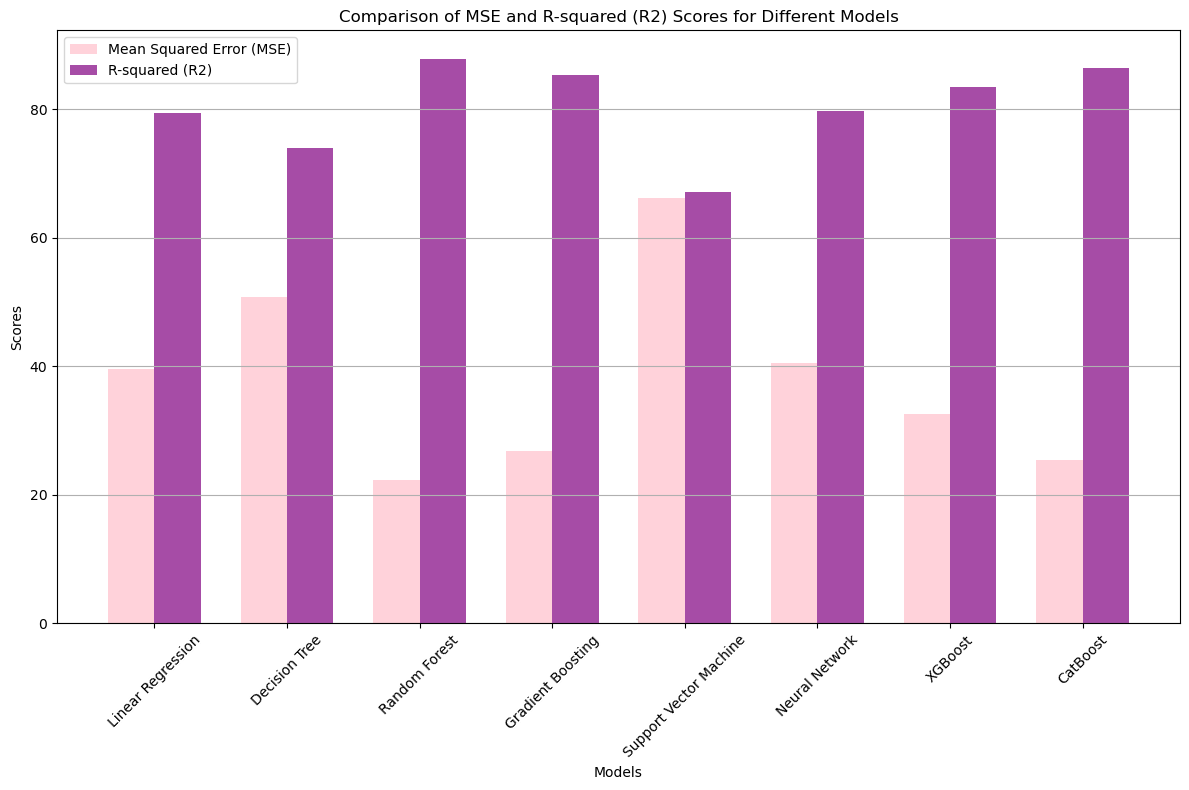

In [74]:
plt.figure(figsize=(12, 8))

plt.bar(index,mse_scores,bar_width,label='Mean Squared Error (MSE)',color='pink',alpha=0.7)
plt.bar(index +bar_width,r2_scores, bar_width,label='R-squared (R2)',color='purple',alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of MSE and R-squared (R2) Scores for Different Models')
plt.xticks(index +bar_width/2,models,rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()